In [36]:
# These are the libraries we'll be working with
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from nltk.stem import WordNetLemmatizer

import math
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# install wordcloud
#!pip install wordcloud 
import lightgbm as lgb

# import PyTorch and transformers libraries
import torch
import transformers

# import package and its set of stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler # for normalizing data

# import metrics
from sklearn import metrics
from sklearn.metrics import f1_score, precision_recall_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# import machine learning models
from sklearn.dummy import DummyClassifier # dummy classifier
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.naive_bayes import MultinomialNB # naive bayes classifier
from lightgbm import LGBMClassifier # lightGBM classifier
from sklearn.linear_model import SGDClassifier # stochastic gradient classifier

import sys
import warnings # ignore warnings
warnings.filterwarnings("ignore")

# Import required libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # For stopwords
from nltk.stem import PorterStemmer # For word stemming
from nltk.tokenize import TweetTokenizer # For toekinizing string to list of words
from nltk.stem import WordNetLemmatizer
import string # For punctuation
import re # For regular expression
import numpy as np
import time
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn import preprocessing #library that alllows label encoding


%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.pardir)
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print('Project libraries has been successfully been imported!')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project libraries has been successfully been imported!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Read from csv file 'imdb_reviews' from the data folder
df = pd.read_csv("./data/imdb_reviews.csv")

In [39]:
# View the dimensions of our data frame
df.shape

(50000, 2)

In [40]:
# Preview our data frame
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [41]:
# View information and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [42]:
# Check for nulls
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [43]:
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [44]:
# Drop duplicates the 418 in 'review' column
df.drop_duplicates(subset='review', 
                   inplace=True, 
                   keep='first')

In [46]:
# Train test split the dataframe
X = df.drop(columns="sentiment")
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:
# Check for duplicates
X_train['review'].duplicated().sum()

In [ ]:
# Drop duplicates the 418 in 'review' column
X_train.drop_duplicates(subset='review', 
                   inplace=True, 
                   keep='first')

In [ ]:
X_train['review'].duplicated().sum()

In [ ]:
X_test['review'].duplicated().sum()

In [ ]:
X_test.drop_duplicates(subset='review', 
                   inplace=True, 
                   keep='first')

In [ ]:
X_test['review'].duplicated().sum()

In [ ]:
# Check out the new shape of our data frame
df.shape

We loaded the data and observe that the dataset consists of 49,582 rows and 2 columns. The `review` column contains 49,582 entries with a datatype *object*. We need to convert all strings to lower case and remove punctuation from `review` column. The `sentiment` column contains 49,582 entries with a datatype *object*. We need to the datatype to *int* and change the values from *positive* to *1* and from *negative* to *0*.

In [ ]:
# Check out the target ('sentiment') class balance 
df['sentiment'].value_counts()

In [ ]:
# Check out the y_train class balance 
y_train.value_counts()

In [ ]:
# Plot the class the balance on a histogram
sns.histplot(data=y_train, 
             discrete=False)

plt.title("Class Balance Comparision")
plt.xlabel("Sentiment")
plt.ylabel("Number of Samples");

In [ ]:
# Check out the y_test class balance 
y_test.value_counts()

In [ ]:
# Plot the class the balance on a histogram
sns.histplot(data=y_test, 
             discrete=False)

plt.title("Class Balance Comparision")
plt.xlabel("Sentiment")
plt.ylabel("Number of Samples");

In [47]:
label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
df

In [ ]:
from PIL import Image
from wordcloud import WordCloud #library that allows word cloud to be generated

def generate_word_cloud(dataframe_df,column_name,img_file=None,background_color="black",max_words=2000):
    """ This function generates word cloud
    
    Args:
        dataframe: the datafram object which contains column whose word cloud is to be generated
        column_name: the name of the column in dataframw whose cloud is to be generated
        
    Returns:
        None
    """
    #convert the column specified by column_name in dataset_df(dataframe) to list
    sentences_list = dataframe_df[column_name].tolist()
    
    #convert a list to sentence
    #sentences_single_string = " ".join(sentences_list)
    sentences_single_string = " ".join(map(str,sentences_list))
    
    #plot word cloud
    plt.figure(figsize=(15,15))
    
    img_mask = None
    
    if img_file != None:
        img_mask = np.array(Image.open(img_file))

    wc = WordCloud(mask=img_mask,
                   max_words=max_words,
                   background_color=background_color)        
        
    plt.imshow(wc.generate(sentences_single_string),interpolation="bilinear")
    plt.title("Word Cloud For " +  column_name)
    plt.show()

In [ ]:
import time

In [ ]:
tic= time.time()
generate_word_cloud(df,
                    "review",
                    background_color="black")
toc = time.time()
diff = 1000*(toc - tic)
print("Total Time Taken: " + str(diff) + " ms")

In [48]:
# Import required libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # For stopwords
from nltk.stem import PorterStemmer # For word stemming
from nltk.tokenize import TweetTokenizer # For toekinizing string to list of words
from nltk.stem import WordNetLemmatizer
import string # For punctuation
import re # For regular expression
import numpy as np
import time
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn import preprocessing #library that alllows label encoding


%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.pardir)
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# def process_string(text):
#     """This function returns a processed list of words from the given text
    
#     This function removes html elements and urls using regular expression, then
#     converts string to list of workds, them find the stem of words in the list of words and
#     finally removes stopwords and punctuation marks from list of words.
    
#     Args:
#         text(string): The text from which hrml elements, urls, stopwords, punctuation are removed and stemmed
        
#     Returns:
#         clean_text(string): A text formed after text preprocessing.
#     """
    
#     # Remove any urls from the text
#     text = re.sub(r"https:\/\/.*[\r\n]*",
#                   "",
#                   text)
    
#     # Remove any urls starting from www. in the text
#     text = re.sub(r"www\.\w*\.\w\w\w",
#                   "",
#                   text)
    
#     # Remove any html elements from the text
#     text = re.sub(r"<[\w]*[\s]*/>",
#                   "",
#                   text)
    
#     # Remove prediods  marks
#     text = re.sub(r"[\.]*",
#                   "",
#                   text)
    
#    # Initialize RegexpTokenizer
#     pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
#     tokenizer = RegexpTokenizer(pattern)
    
#     # Tokenize text
#     text_tokens = tokenizer.tokenize(text)
    
#     # Intizlize porter stemmer
#     porter_stemmer = PorterStemmer()
    
#     # Get english stopwords
#     english_stopwords = stopwords.words("english")
    
#     cleaned_text_tokens = [] # A list to hold cleaned text tokens
    
#     for word in text_tokens:
#         if((word not in english_stopwords) and # Remove stopwords
#             (word not in string.punctuation)): # Remove punctuation marks
                
#                 stemmed_word = porter_stemmer.stem(word) # Get stem of the current word
#                 cleaned_text_tokens.append(stemmed_word) # Appened stemmed word to list of cleaned list
    
#     # Combine list into single string
#     clean_text = " ".join(cleaned_text_tokens)
    
#     return clean_text

In [49]:
def process_string(text):
    """This function returns a processed list of words from the given text
    
    This function removes html elements and urls using regular expression, then
    converts string to list of workds, them find the stem of words in the list of words and
    finally removes stopwords and punctuation marks from list of words.
    
    Args:
        text(string): The text from which hrml elements, urls, stopwords, punctuation are removed and stemmed
        
    Returns:
        clean_text(string): A text formed after text preprocessing.
    """
    
    # Remove any urls from the text
    text = re.sub(r"https:\/\/.*[\r\n]*",
                  "",
                  text)
    
    # Remove any urls starting from www. in the text
    text = re.sub(r"www\.\w*\.\w\w\w",
                  "",
                  text)
    
    # Remove any html elements from the text
    text = re.sub(r"<[\w]*[\s]*/>",
                  "",
                  text)
    
    # Remove prediods  marks
    text = re.sub(r"[\.]*",
                  "",
                  text)
    
    # Initialize RegexpTokenizer
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenizer = RegexpTokenizer(pattern)

    
    # Tokenize text
    text_tokens = tokenizer.tokenize(text)
    
    lemmatizer  = WordNetLemmatizer()
    # Get english stopwords
    english_stopwords = stopwords.words("english")
    
    cleaned_text_tokens = [] # A list to hold cleaned text tokens
    
    for word in text_tokens:
        if((word not in english_stopwords) and # Remove stopwords
            (word not in string.punctuation)): # Remove punctuation marks
                
                lemmas = lemmatizer.lemmatize(word) # Get lemma of the current word
                cleaned_text_tokens.append(lemmas) # Appened lemma word to list of cleaned list
    
    # Combine list into single string
    clean_text = " ".join(cleaned_text_tokens)
    
    return clean_text


In [ ]:
# View a record without process_string() applied
df["review"].iloc[4]

In [ ]:
# View the same record after applying process_string()
process_string(df["review"].iloc[4])

<p> <h5> Clearly this cleaned review is free of html tags as well now. Lets apply this new text cleaning method to all 50k reviews </h5> </p>

In [50]:
X_train["review"] = X_train["review"].apply(process_string)
X_test["review"] = X_test["review"].apply(process_string)

In [51]:
#save processed reviews for future use
#save file to csv
X_train.to_csv("./data/imdb_reviews_X_train.csv")
X_test.to_csv("./data/imdb_reviews_X_test.csv")

In [52]:
X_train = pd.read_csv("./data/imdb_reviews_X_train.csv")
X_test = pd.read_csv("./data/imdb_reviews_X_test.csv")

<p> <h5>
Lets look at reviews after they have been cleaned
</h5> </p>

In [ ]:
tic = time.time()
generate_word_cloud(df,
                    "review",
                    background_color="black")
toc = time.time()
diff = toc - tic
print("Total Time Taken: " + str(diff) + " ms")

In [ ]:
#import label encoder
from sklearn import preprocessing #library that alllows label encoding

label_encoder = preprocessing.LabelEncoder() #instantiate label encoder
label_matrix = label_encoder.fit_transform(df["sentiment"]) #encoded

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer() #instantiate vectorizer

In [ ]:
feature_matrix = vectorizer.fit_transform(df["review"].tolist())

In [ ]:
feature_matrix.shape

In [ ]:
matrix_df = pd.DataFrame.sparse.from_spmatrix(data=feature_matrix, columns=vectorizer.get_feature_names())

In [ ]:
matrix_df.iloc[10000:10005, 10000:10005].transpose()

In [ ]:
from matplotlib import pyplot as plt
import time

def plot_top_words(document_term_df,upper_threshold=10000,lower_threshold=10,count=20):
    
    #for time purposes
    tic = time.time()
    
    top_word_freq = {}
    #build frequency dictionary
    for col in document_term_df.columns:
        
        col_count = document_term_df[col].to_numpy().max()
        
        if lower_threshold < col_count < upper_threshold:
            top_word_freq[col] = col_count
            
        if len(top_word_freq) > count:
            break

    #print thresholds
    print("Upper Limit: " + str(upper_threshold))
    print("Lower Limit: " + str(lower_threshold))
    print("Requested Count: " + str(count))
    
    plt.figure(figsize=(20,10))
    
    y_vals = [top_word_freq[word] for word in top_word_freq.keys()]
    
    anotates = list(top_word_freq.keys())
    
    x_vals = [i for i in range(0,len(y_vals))]
    
    plt.scatter(x_vals,y_vals)

    plt.title("Top Word Counts")
    plt.xlabel("Top Words")
    plt.ylabel("Word Frequency")
    
    for y,a,x in zip(y_vals,anotates,x_vals):
        plt.annotate(a, #anotate
                     (x,y), #for this data point 
                    textcoords="offset points", #how to position text
                    xytext=(0,10), #distance from text to points (x,y)
                    ha="center") #horizontal alignment can beleft, right or center 
    
    #for time purposes
    toc = time.time()
    tictoc = (toc-tic)*1000
    print("Time Taken: " + str(tictoc) + " ms")

In [ ]:
plot_top_words(matrix_df,
               upper_threshold=10000,
               lower_threshold=25,
               count=50)

In [ ]:
plot_top_words(matrix_df[label_matrix == 1],
               upper_threshold=10000,
               lower_threshold=20,
               count=100)

In [ ]:
plot_top_words(matrix_df[label_matrix == 0],
               upper_threshold=10000,
               lower_threshold=20,
               count=100)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tf_idf = TfidfVectorizer(strip_accents=True,
                         ngram_range=(2, 1), 
                         min_df=2,
                         stop_words=True,
                         lowercase=True)

In [54]:
tf_idf = TfidfVectorizer()

X_train = tf_idf.fit_transform(X_train["review"].tolist())
X_test = tf_idf.transform(X_test["review"].tolist())

print(X_train.shape, X_test.shape)

(39665, 133850) (9917, 133850)


In [ ]:
X_train_df = pd.DataFrame.sparse.from_spmatrix(data=X_train, 
                                               columns=tf_idf.get_feature_names())

X_test_df = pd.DataFrame.sparse.from_spmatrix(data=X_test, 
                                              columns=tf_idf.get_feature_names())

In [ ]:
X_train_df.iloc[10000:10005, 10000:10005].transpose()

In [ ]:
#convert train matrix from numpy matrix to pandas
review_train_df = pd.DataFrame()
review_train_df["review"] = review_train
review_train_df["sentiment"] = labels_train
review_train_df.info()

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [18]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [19]:
# Create Dummy/Baseliner
from sklearn.dummy import DummyClassifier

pipe = Pipeline(steps=[
    ('estimator', DummyClassifier(strategy='most_frequent'))
])

cv = ModelWithCV(pipe, 'estimator', X_train, y_train)

In [20]:
cv.print_cv_summary()

CV Results for `estimator` model:
            0.50185 ± 0.00008 accuracy
        


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      4939
    positive       0.50      1.00      0.67      4978

    accuracy                           0.50      9917
   macro avg       0.25      0.50      0.33      9917
weighted avg       0.25      0.50      0.34      9917



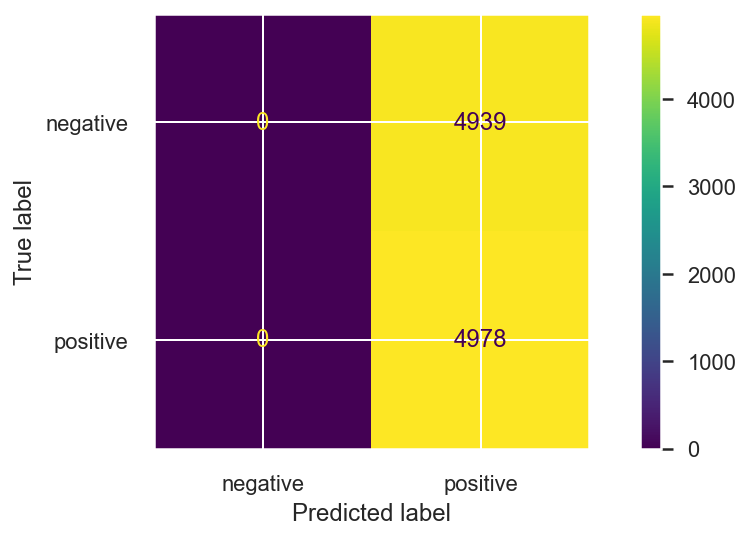

In [21]:
# Create Dummy/Baseliner
estimator = DummyClassifier(strategy='most_frequent')
estimator.fit(X_train, y_train)

# Get predictions with dummy model
y_pred = estimator.predict(X_test)


# Set figsize and font scale
sns.set(rc={'figure.figsize':(9, 4)})
sns.set(font_scale=1)

# Set diply labesl for confusion matrix
display_labels = ['negative', 'positive']

# Plot a confusion matrix on the test data
plot_confusion_matrix(estimator=estimator,
                      X=X_test,
                      y_true=y_test,
                      display_labels=display_labels)

# Save confusion matrix as png and place it in the images folder
plt.savefig('images/Confusion_Matrix_Dummy');

target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  7.5min finished


Mean Training Score: 92.62%

Mean Test Score: 89.36%

Optimal Parameters: {'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}

Testing Accuracy: 89.47%

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4939
    positive       0.89      0.90      0.90      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



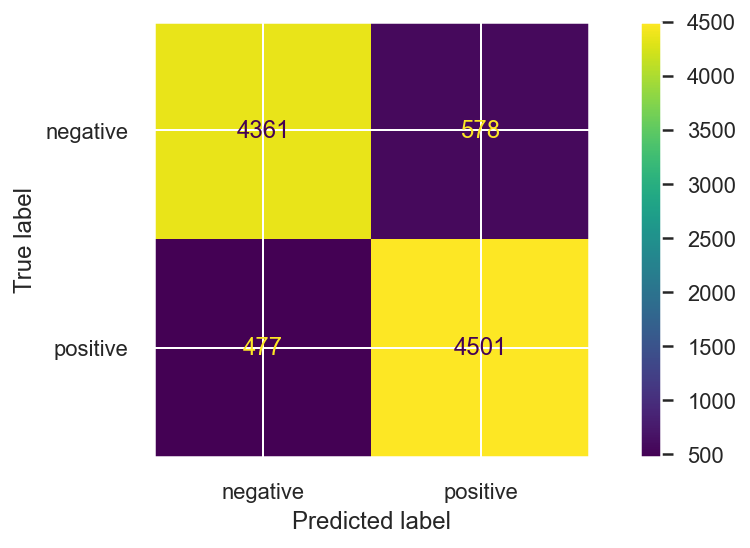

In [22]:
pipe = Pipeline(steps=[
    ('estimator', LogisticRegression(random_state=42))
])



param_grid = {}
param_grid['estimator__C'] = [100, 10, 1.0, 0.1, 0.01]
param_grid['estimator__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param_grid['estimator__penalty'] = ['l2']



grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='accuracy', 
                           n_jobs=-1,
                           verbose=2)



# Fit models run gridsearch
grid_search.fit(X_train, y_train)

# Mean training score
grid_train_score = np.mean(grid_search.cv_results_['mean_train_score'])

# Mean test score
grid_test_score = grid_search.score(X_test, y_test)

best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
y_pred = best_grid.predict(X_test)



print(f"Mean Training Score: {grid_train_score:.2%}\n")
print(f"Mean Test Score: {grid_test_score:.2%}\n")

print(f"Optimal Parameters: {grid_search.best_params_}\n")
print(f"Testing Accuracy: {grid_search.best_score_:.2%}\n")

# Label 0 and 1 in classification reports
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))




# Set figsize and font scale
sns.set(rc={'figure.figsize':(9, 4)})
sns.set(font_scale=1)

# Set diply labesl for confusion matrix
display_labels = ['negative', 'positive']

# Plot a confusion matrix on the test data
plot_confusion_matrix(estimator=best_grid,
                      X=X_test,
                      y_true=y_test,
                      display_labels=display_labels)

# Save confusion matrix as png and place it in the images folder
plt.savefig('images/Confusion_Matrix_LogReg');

Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.1s finished


Mean Training Score: 92.79%

Mean Test Score: 86.55%

Optimal Parameters: {'estimator__alpha': 0.5}

Testing Accuracy: 86.37%

              precision    recall  f1-score   support

    negative       0.86      0.87      0.87      4939
    positive       0.87      0.86      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



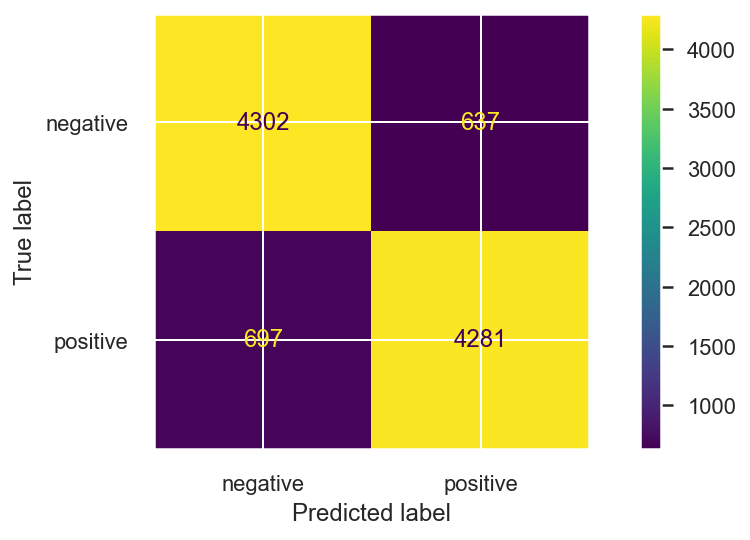

In [62]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline(steps=[
    ('estimator', MultinomialNB())
])



param_grid = {}
param_grid['estimator__alpha'] = [0.01, 0.1, 0.5, 1.0, 10.0]



grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='accuracy', 
                           n_jobs=-1,
                           verbose=2)



# Fit models run gridsearch
grid_search.fit(X_train, y_train)

# Mean training score
grid_train_score = np.mean(grid_search.cv_results_['mean_train_score'])

# Mean test score
grid_test_score = grid_search.score(X_test, y_test)

best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
y_pred = best_grid.predict(X_test)



print(f"Mean Training Score: {grid_train_score:.2%}\n")
print(f"Mean Test Score: {grid_test_score:.2%}\n")

print(f"Optimal Parameters: {grid_search.best_params_}\n")
print(f"Testing Accuracy: {grid_search.best_score_:.2%}\n")

# Label 0 and 1 in classification reports
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))




# Set figsize and font scale
sns.set(rc={'figure.figsize':(9, 4)})
sns.set(font_scale=1)

# Set diply labesl for confusion matrix
display_labels = ['negative', 'positive']

# Plot a confusion matrix on the test data
plot_confusion_matrix(estimator=best_grid,
                      X=X_test,
                      y_true=y_test,
                      display_labels=display_labels)

# Save confusion matrix as png and place it in the images folder
plt.savefig('images/Confusion_Matrix_LogReg');

In [ ]:
# Set figsize and font scale
sns.set(rc={'figure.figsize':(9, 4)})
sns.set(font_scale=1)

# Set diply labesl for confusion matrix
display_labels = ['negative', 'positive']

# Plot a confusion matrix on the test data
plot_confusion_matrix(estimator=best_grid,
                      X=X_test,
                      y_true=y_test,
                      display_labels=display_labels)

# Save confusion matrix as png and place it in the images folder
plt.savefig('images/Confusion_Matrix_LogReg');

In [ ]:
# function to evaluate classification models
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

In [ ]:
# evaluate dummy model
evaluate_model(best_grid, X_train, y_train, X_test, y_test)

In [ ]:
pipe = Pipeline(steps=[
    ('estimator', SVC(random_state=42))
])



kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']



param_grid = {}
param_grid['estimator__kernel'] = ['poly', 'rbf', 'sigmoid']
param_grid['estimator__C'] = [50, 10, 1.0, 0.1, 0.01]
param_grid['estimator__gamma'] = ['scale']



grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)



# Fit models run gridsearch
grid_search.fit(X_train, y_train)

# Mean training score
grid_train_score = np.mean(grid_search.cv_results_['mean_train_score'])

# Mean test score
grid_test_score = grid_search.score(X_test, y_test)

best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
y_pred = best_grid.predict(X_test)



print(f"Mean Training Score: {grid_train_score:.2%}\n")
print(f"Mean Test Score: {grid_test_score:.2%}\n")

print(f"Optimal Parameters: {grid_search.best_params_}\n")
print(f"Testing Accuracy: {grid_search.best_score_:.2%}\n")

# Label 0 and 1 in classification reports
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
pipe = Pipeline(steps=[
    ('estimator', RidgeClassifier())
])



param_grid = {}
# param_grid['estimator__alpha'] = [1, 0.1, 0.01, 0.001, 0.0001, 0]
param_grid['estimator__alpha'] = np.linspace(0, 200, num=50)
param_grid['estimator__fit_intercept'] = [True]
# param_grid['estimator__solver'] = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']


grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)




# Fit models run gridsearch
grid_search.fit(X_train, y_train)

# Mean training score
grid_train_score = np.mean(grid_search.cv_results_['mean_train_score'])

# Mean test score
grid_test_score = grid_search.score(X_test, y_test)

best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
y_pred = best_grid.predict(X_test)



print(f"Mean Training Score: {grid_train_score:.2%}\n")
print(f"Mean Test Score: {grid_test_score:.2%}\n")

print(f"Optimal Parameters: {grid_search.best_params_}\n")
print(f"Testing Accuracy: {grid_search.best_score_:.2%}\n")

# Label 0 and 1 in classification reports
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))



# Set figsize and font scale
sns.set(rc={'figure.figsize':(9, 4)})
sns.set(font_scale=1)

# Set diply labesl for confusion matrix
display_labels = ['negative', 'positive']

# Plot a confusion matrix on the test data
plot_confusion_matrix(estimator=best_grid,
                      X=X_test,
                      y_true=y_test,
                      display_labels=display_labels)

# Save confusion matrix as png and place it in the images folder
plt.savefig('images/Confusion_Matrix_Ridge');

In [ ]:
pipe = Pipeline(steps=[
    ('estimator', KNeighborsClassifier())
])



param_grid = {}
param_grid['estimator__n_neighbors'] = range(1, 21, 2)
# param_grid['estimator__p'] = [1, 2]
# param_grid['estimator__weights'] = ['uniform', 'distance']
param_grid['estimator__metric'] = ['euclidean', 'manhattan', 'minkowski']
# param_grid['estimator__leaf_size'] = (20, 40, 1)



grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='accuracy',
                           n_jobs = -1,
                           verbose=2)



# Fit models run gridsearch
grid_search.fit(X_train, y_train)

# Mean training score
grid_train_score = np.mean(grid_search.cv_results_['mean_train_score'])

# Mean test score
grid_test_score = grid_search.score(X_test, y_test)

best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
y_pred = best_grid.predict(X_test)



print(f"Mean Training Score: {grid_train_score:.2%}\n")
print(f"Mean Test Score: {grid_test_score:.2%}\n")

print(f"Optimal Parameters: {grid_search.best_params_}\n")
print(f"Testing Accuracy: {grid_search.best_score_:.2%}\n")

# Label 0 and 1 in classification reports
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# evaluate dummy model
evaluate_model(best_grid, X_train, y_train, X_test, y_test)